In [1]:
import pandas as pd  # For data manipulation  
import numpy as np  # For numerical operations  
import matplotlib.pyplot as plt  # For data visualization  
import seaborn as sns  # For advanced visualizations  


In [3]:
df = pd.read_csv("Netflix.csv")  # Reading the Netflix dataset


In [ ]:
## Check Dataset Structure

In [4]:
df.info()  # Display dataset info (column names, types, missing values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
## Check Missing Values


In [5]:
df.isnull().sum()  # Count missing values in each column


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
## Drop Missing Values

In [11]:
df_cleaned = df.dropna()  # Remove rows with missing values


In [ ]:
## Check for Duplicate Values

In [7]:
df_cleaned.duplicated().sum()  # Count duplicate rows


0

In [ ]:
## Count Movies vs TV Shows

In [8]:
df_cleaned["type"].value_counts()


Movie      5185
TV Show     147
Name: type, dtype: int64

In [ ]:
## Find Most Common Genres 

In [9]:
df_cleaned["listed_in"].value_counts().head(10)


Dramas, International Movies                        336
Stand-Up Comedy                                     286
Comedies, Dramas, International Movies              257
Dramas, Independent Movies, International Movies    243
Children & Family Movies, Comedies                  179
Dramas, International Movies, Romantic Movies       160
Documentaries                                       156
Comedies, International Movies                      152
Comedies, International Movies, Romantic Movies     143
Dramas                                              133
Name: listed_in, dtype: int64

In [ ]:
## Count Content Released Each Year

In [10]:
df_cleaned["release_year"].value_counts().sort_index()



1942      1
1944      1
1945      1
1946      1
1947      1
       ... 
2017    657
2018    648
2019    519
2020    442
2021    161
Name: release_year, Length: 72, dtype: int64

In [ ]:
## Find the top 10 Countries Producing Content

In [12]:
df_cleaned["country"].value_counts().head(10)


United States     1846
India              875
United Kingdom     183
Canada             107
Spain               91
Egypt               90
Nigeria             88
Japan               83
Turkey              79
Indonesia           76
Name: country, dtype: int64

In [ ]:
## Find the Most Common Rating

In [13]:
df_cleaned["rating"].value_counts()


TV-MA       1822
TV-14       1214
R            778
PG-13        470
TV-PG        431
PG           275
TV-G          84
TV-Y7         76
TV-Y          76
NR            58
G             40
TV-Y7-FV       3
UR             3
NC-17          2
Name: rating, dtype: int64

In [ ]:
## Bar Chart- Movies vs TV Shows

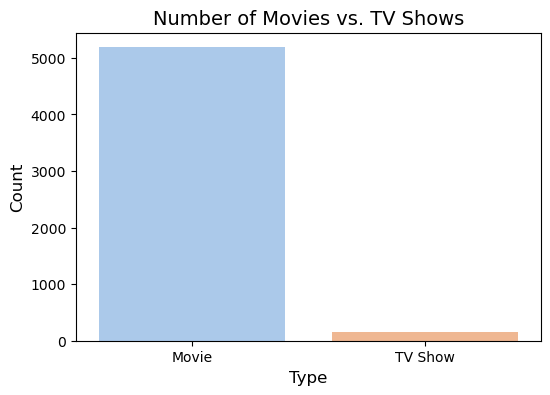

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x=df_cleaned["type"], palette="pastel")
plt.title("Number of Movies vs. TV Shows", fontsize=14)
plt.xlabel("Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


In [ ]:
## Line Chart- Content Released Over the Years

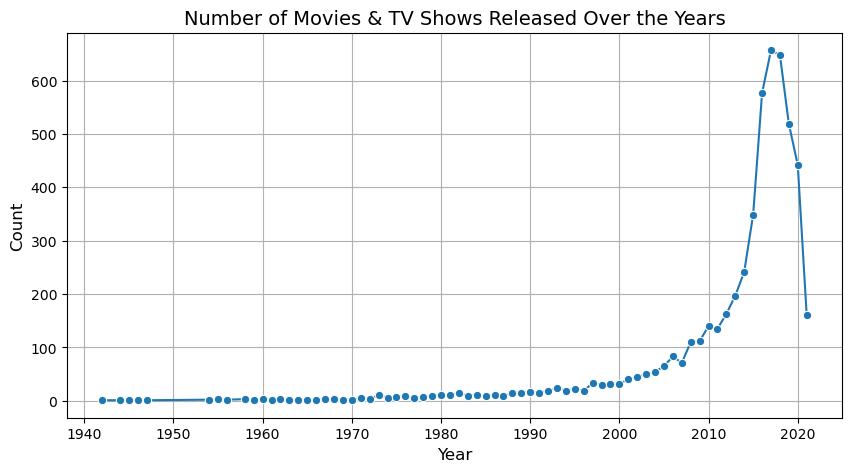

In [15]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df_cleaned["release_year"].value_counts().sort_index().index, 
             y=df_cleaned["release_year"].value_counts().sort_index().values, marker="o")
plt.title("Number of Movies & TV Shows Released Over the Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
## Pie Chart- Content Distribution by Rating

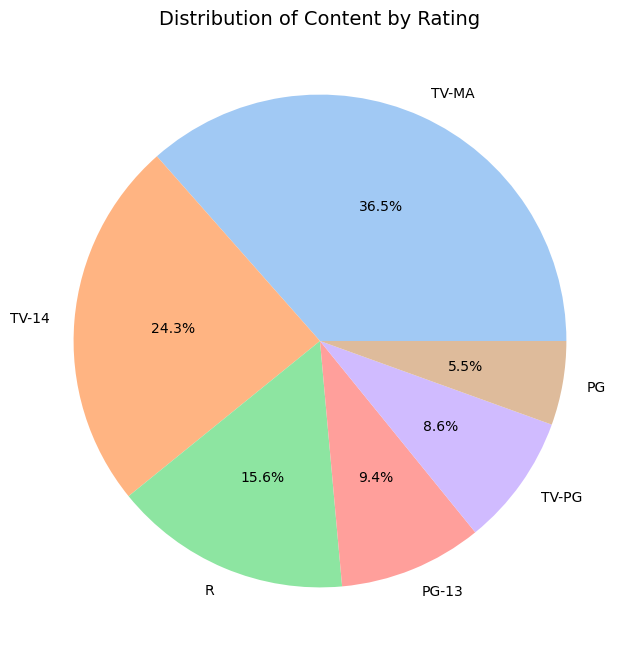

In [16]:
plt.figure(figsize=(8,8))
df_cleaned["rating"].value_counts().head(6).plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Distribution of Content by Rating", fontsize=14)
plt.ylabel("")
plt.show()


In [ ]:
## Horizontal Bar Chart- Top 10 Genres

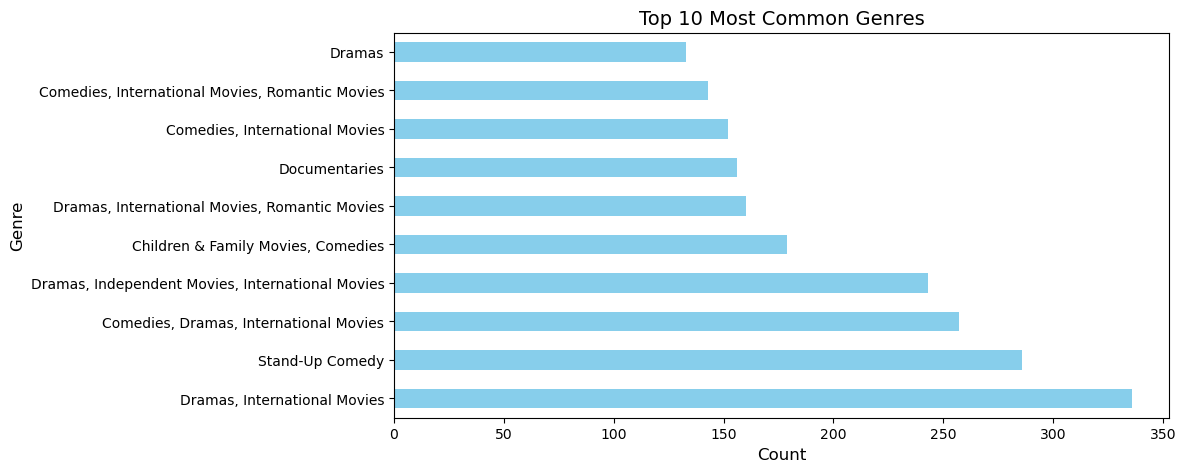

In [17]:
plt.figure(figsize=(10,5))
df_cleaned["listed_in"].value_counts().head(10).plot(kind="barh", color="skyblue")
plt.title("Top 10 Most Common Genres", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.show()


In [ ]:
## Convert 'Release Year' into a Numpy Array

In [18]:
release_years = np.array(df_cleaned["release_year"])


In [ ]:
## Find the Earliest & Latest Release Year

In [19]:
earliest_year = np.min(release_years)
latest_year = np.max(release_years)

print("Earliest Release Year:", earliest_year)
print("Latest Release Year:", latest_year)



Earliest Release Year: 1942
Latest Release Year: 2021


In [ ]:
## Calculate the Average Release Year

In [20]:
average_year = np.mean(release_years)
print("Average Release Year:", round(average_year, 2))


Average Release Year: 2012.74


In [ ]:
## Find the Most Common Release Year Using NumPy

In [21]:
most_common_year = np.bincount(release_years).argmax()
print("Most Common Release Year:", most_common_year)


Most Common Release Year: 2017


In [ ]:
##Count Titles Released Before 2000

In [22]:
titles_before_2000 = np.sum(release_years < 2000)
print("Number of Titles Released Before 2000:", titles_before_2000)


Number of Titles Released Before 2000: 441


In [ ]:
## Create a Boolean Mask for Movies Released After 2015

In [23]:
after_2015 = release_years > 2015
print("Titles Released After 2015:", np.sum(after_2015))


Titles Released After 2015: 3004


In [ ]:
##  Select 5 Random Release Years

In [24]:
random_years = np.random.choice(release_years, 5, replace=False)
print("Random Release Years:", random_years)


Random Release Years: [1992 2016 2019 2016 2017]
